In [1]:
# Ocean Heat Budget Analyses in the Antarctica continental shelf (WAOM)

# Fabio B Dias - 3 May 2023
# Description:
#     this script compares methods of calculate the OHC and surface heat flux integrated over the continental shelf
#     - update to xarray open_mfdataset from open_dataset brought new functions more efficient to calculate model layer thickness (dz)
# and ocean heat content tendencies (rho0*Cp*dT/dt). 

In [2]:
# read nc output from WAOM 10km run

import xarray as xr
# import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

import gsw

import pyresample

from dask.distributed import Client
import logging
import warnings
warnings.filterwarnings('ignore')

In [3]:
# client = Client(threads_per_worker=1, memory_limit=0, silence_logs=logging.ERROR)
# print(client)

In [4]:
fig_path = '/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/'

In [5]:
tmp_files_dir = '/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/cross_contour_tmp/'

# load temp tendency and shflux integrated over the shelf (south of 1500m isobath):
expt = 'WAOM10'

ds = xr.open_dataset(tmp_files_dir + expt + '_OHB_1500m_temp_rate_vint_daily')
temp_rate_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()
ds = xr.open_dataset(tmp_files_dir + expt + '_OHB_1500m_shflux_vint_daily')
shflux_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()


In [6]:
expt = 'WAOM4'

ds = xr.open_dataset(tmp_files_dir + expt + '_OHB_1500m_temp_rate_vint_5daily')
temp_rate_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()
ds = xr.open_dataset(tmp_files_dir + expt + '_OHB_1500m_shflux_vint_5daily')
shflux_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()


In [7]:
expt = 'WAOM4_notides'

ds = xr.open_dataset(tmp_files_dir + expt + '_OHB_1500m_temp_rate_vint_5daily')
temp_rate_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()
ds = xr.open_dataset(tmp_files_dir + expt + '_OHB_1500m_shflux_vint_5daily')
shflux_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

In [8]:
# expt = 'WAOM2'

# ds = xr.open_dataset(tmp_files_dir + expt + '_OHB_1500m_temp_rate_vint_5daily')
# temp_rate_2km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()
# ds = xr.open_dataset(tmp_files_dir + expt + '_OHB_1500m_shflux_5daily')
# shflux_2km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

In [9]:
# OHB integrated
print('OHC tendency annual avg: ',np.mean(temp_rate_10km)*1e-15)
# print(np.mean(temp_rate2_int)*1e-15)
print('Net sfc heat flux annual avg: ',np.mean(shflux_10km)*1e-15)
print('Residue (OHC - shflux): ',(np.mean(temp_rate_10km)-np.mean(shflux_10km))*1e-15)



OHC tendency annual avg:  <xarray.Variable ()>
array(0.00509129)
Net sfc heat flux annual avg:  <xarray.Variable ()>
array(-0.06763895)
Residue (OHC - shflux):  <xarray.Variable ()>
array(0.07273024)


In [10]:
# OHB integrated
print('OHC tendency annual avg: ',np.mean(temp_rate_4km)*1e-15)
# print(np.mean(temp_rate2_int)*1e-15)
print('Net sfc heat flux annual avg: ',np.mean(shflux_4km)*1e-15)
print('Residue (OHC - shflux): ',(np.mean(temp_rate_4km)-np.mean(shflux_4km))*1e-15)



OHC tendency annual avg:  <xarray.Variable ()>
array(0.00402587)
Net sfc heat flux annual avg:  <xarray.Variable ()>
array(-0.0659712)
Residue (OHC - shflux):  <xarray.Variable ()>
array(0.06999708)


In [11]:
# OHB integrated
print('OHC tendency annual avg: ',np.mean(temp_rate_4kmNT).values*1e-12)
# print(np.mean(temp_rate2_int)*1e-12)
print('Net sfc heat flux annual avg: ',np.mean(shflux_4kmNT).values*1e-12)
print('Residue (OHC - shflux): ',(np.mean(temp_rate_4kmNT)-np.mean(shflux_4kmNT)).values*1e-12)



OHC tendency annual avg:  1.9290001901936822
Net sfc heat flux annual avg:  -63.1745205589216
Residue (OHC - shflux):  65.10352074911528


In [12]:
np.mean(temp_rate_4kmNT).values*1e-12

1.9290001901936822

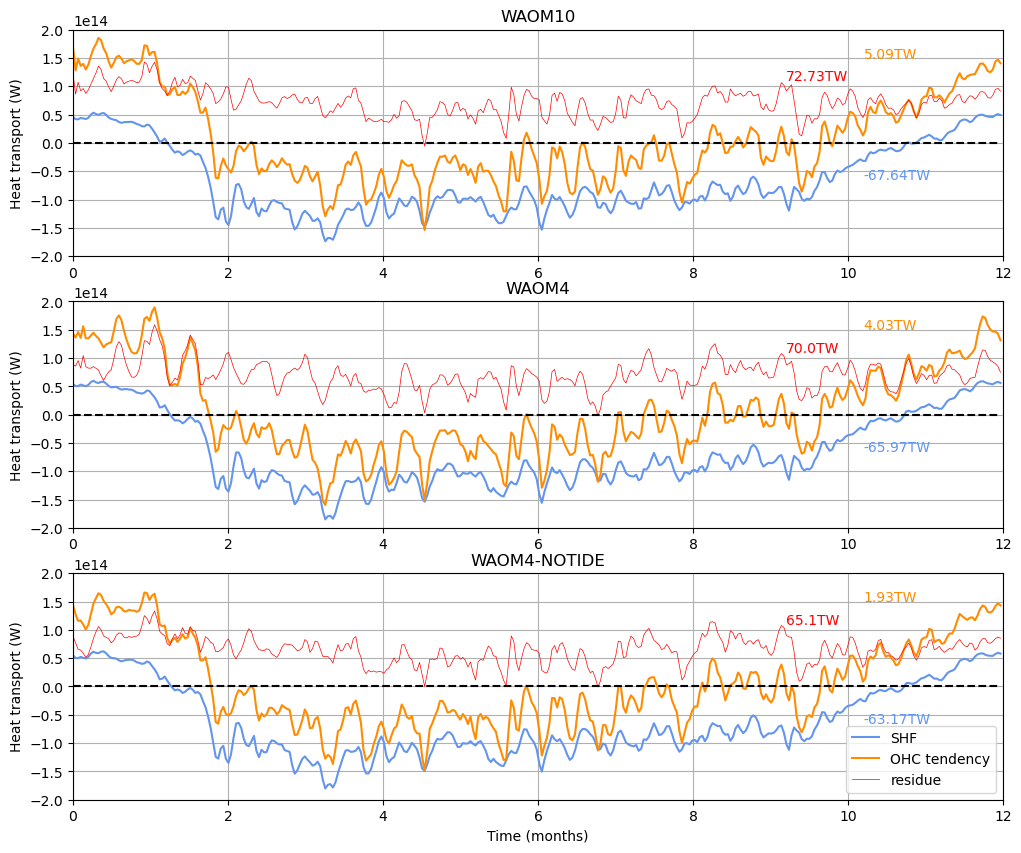

In [13]:
months=np.arange(0,365)*(1/30.41667)
months_1d=np.arange(0,365)*(1/30.41667)

fig, ax = plt.subplots(nrows=3, figsize = (12, 10))
ax[0].plot(months,shflux_10km, color='cornflowerblue', label='SHF - WAOM10')
ax[0].plot(months,temp_rate_10km, color='darkorange', label='OHC tend - WAOM10')
ax[0].plot(months,temp_rate_10km - shflux_10km, '-r', label='residue - WAOM10',linewidth=0.5)
# print annual avg values:
ax[0].text(10.2,-.65e14,str(np.round(np.mean(shflux_10km).values*1e-12,decimals=2)) + 'TW', color='cornflowerblue')
ax[0].text(10.2,1.5e14,str(np.round(np.mean(temp_rate_10km).values*1e-12,decimals=2)) + 'TW', color='darkorange')
ax[0].text(9.2,1.1e14,str(np.round(np.mean(temp_rate_10km - shflux_10km).values*1e-12,decimals=2)) + 'TW', color='red')

ax[1].plot(months_1d,shflux_4km, color='cornflowerblue', linestyle='-', label='SHF - WAOM4')
ax[1].plot(months_1d,temp_rate_4km, color='darkorange', linestyle='-', label='OHC tend - WAOM4')
ax[1].plot(months_1d,temp_rate_4km - shflux_4km, '-r', label='residue - WAOM4',linewidth=0.5)
# print annual avg values:
ax[1].text(10.2,-.65e14,str(np.round(np.mean(shflux_4km).values*1e-12,decimals=2)) + 'TW', color='cornflowerblue')
ax[1].text(10.2,1.5e14,str(np.round(np.mean(temp_rate_4km).values*1e-12,decimals=2)) + 'TW', color='darkorange')
ax[1].text(9.2,1.1e14,str(np.round(np.mean(temp_rate_4km - shflux_4km).values*1e-12,decimals=2)) + 'TW', color='red')

ax[2].plot(months_1d,shflux_4kmNT, color='cornflowerblue', linestyle='-', label='SHF')# - WAOM4-NOTIDE')
ax[2].plot(months_1d,temp_rate_4kmNT,color='darkorange', linestyle='-', label='OHC tendency')# - WAOM4-NOTIDE')
ax[2].plot(months_1d,temp_rate_4kmNT - shflux_4kmNT, ':r', linestyle='-', linewidth=0.5, label='residue')# - WAOM4-NOTIDE')
# print annual avg values:
ax[2].text(10.2,-.65e14,str(np.round(np.mean(shflux_4kmNT).values*1e-12,decimals=2)) + 'TW', color='cornflowerblue')
ax[2].text(10.2,1.5e14,str(np.round(np.mean(temp_rate_4kmNT).values*1e-12,decimals=2)) + 'TW', color='darkorange')
ax[2].text(9.2,1.1e14,str(np.round(np.mean(temp_rate_4kmNT - shflux_4kmNT).values*1e-12,decimals=2)) + 'TW', color='red')

ax[0].plot(months,shflux_10km*0,'--k')
ax[0].set_ylim([-2e14,2e14])
ax[0].set_xlim([0,12])
ax[1].plot(months,shflux_10km*0,'--k')
ax[1].set_ylim([-2e14,2e14])
ax[1].set_xlim([0,12])
ax[2].plot(months,shflux_10km*0,'--k')
ax[2].set_ylim([-2e14,2e14])
ax[2].set_xlim([0,12])

ax[0].grid()
# ax[0].legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
ax[0].set_ylabel('Heat transport (W)')
ax[0].title.set_text('WAOM10')

ax[1].grid()
# ax[1].legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
ax[1].set_ylabel('Heat transport (W)')
ax[1].title.set_text('WAOM4')

ax[2].grid()
# ax[2].legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
ax[2].legend()
ax[2].set_ylabel('Heat transport (W)')
ax[2].title.set_text('WAOM4-NOTIDE')
ax[2].set_xlabel('Time (months)')

name_fig='WAOM10x4x4NT_OHB_south1500m_vint_annual2.png'
plt.savefig(fig_path + name_fig, dpi=300)

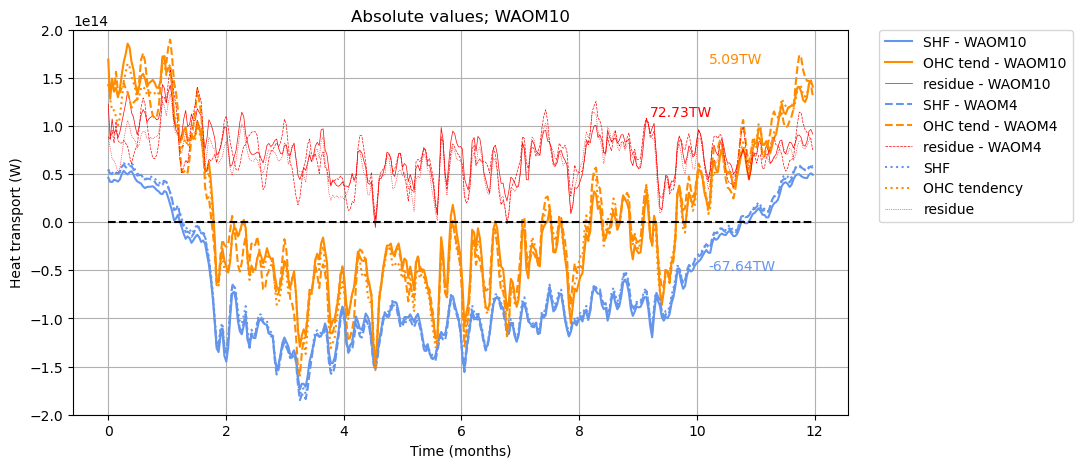

In [14]:
months=np.arange(0,365)*(1/30.41667)

fig, ax = plt.subplots(ncols=1, figsize = (10, 5))
plt.plot(months,shflux_10km, color='cornflowerblue', label='SHF - WAOM10')
plt.plot(months,temp_rate_10km, color='darkorange', label='OHC tend - WAOM10')
plt.plot(months,temp_rate_10km - shflux_10km, '-r', label='residue - WAOM10',linewidth=0.5)

plt.plot(months,shflux_4km, color='cornflowerblue', linestyle='--', label='SHF - WAOM4')
plt.plot(months,temp_rate_4km, color='darkorange', linestyle='--', label='OHC tend - WAOM4')
plt.plot(months,temp_rate_4km - shflux_4km, '--r', label='residue - WAOM4',linewidth=0.5)

plt.plot(months,shflux_4kmNT, color='cornflowerblue', linestyle='dotted', label='SHF')# - WAOM4-NOTIDE')
plt.plot(months,temp_rate_4kmNT,color='darkorange', linestyle='dotted', label='OHC tendency')# - WAOM4-NOTIDE')
plt.plot(months,temp_rate_4kmNT - shflux_4kmNT, ':r', linestyle='dotted', linewidth=0.5, label='residue')# - WAOM4-NOTIDE')

plt.plot(months,shflux_10km*0,'--k')
plt.ylim([-2e14,2e14])
# print annual avg values:
plt.text(10.2,-.5e14,str(np.round(np.mean(shflux_10km).values*1e-12,decimals=2)) + 'TW', color='cornflowerblue')
plt.text(10.2,1.65e14,str(np.round(np.mean(temp_rate_10km).values*1e-12,decimals=2)) + 'TW', color='darkorange')
plt.text(9.2,1.1e14,str(np.round(np.mean(temp_rate_10km - shflux_10km).values*1e-12,decimals=2)) + 'TW', color='red')

plt.grid()
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.ylabel('Heat transport (W)')
plt.xlabel('Time (months)')
plt.title('Absolute values; WAOM10')


name_fig='WAOM10x4x4NT_OHB_south1500m_vint_annual.png'
plt.savefig(fig_path + name_fig, dpi=300)

In [15]:
fig_path

'/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/'

In [16]:
%%time

# temp_rate_int, shflux_int

months=np.arange(0,73)*(5/30.41667)

# save to netcdf file:
coordinatesC=dict(ocean_time=months)

temp_rate_int_xr = xr.DataArray(temp_rate_int, coords = coordinatesC, dims = ['ocean_time'])
shflux_int_xr = xr.DataArray(shflux_int, coords = coordinatesC, dims = ['ocean_time'])

files_path = '/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/cross_contour_tmp/'
temp_rate_int_xr.to_netcdf(files_path + 'WAOM10_OHB_1500m_temp_rate_vint_5daily', mode='w', format="NETCDF4")
shflux_int_xr.to_netcdf(files_path + 'WAOM10_OHB_1500m_shflux_vint_5daily', mode='w', format="NETCDF4")

NameError: name 'temp_rate_int' is not defined

In [17]:
shflux_int.shape

NameError: name 'shflux_int' is not defined

In [ ]:
# calculate anomaly values:
ohc_tend = temp_rate_int - np.nanmean(temp_rate_int)
# ohc_tend2 = temp_rate2_int - np.nanmean(temp_rate2_int)
shflux_tend = shflux_int - np.nanmean(shflux_int)

fig, ax = plt.subplots(ncols=1, figsize = (10, 6))
plt.plot(months,shflux_tend, label='Sfc heat flux')
plt.plot(months,ohc_tend, label='OHC tendency')
# plt.plot(months,ohc_tend2,'--', label='OHC tendency old')
plt.plot(months,shflux_int*0,'--k')
plt.plot(months,ohc_tend - shflux_tend, '--r', label='residual',linewidth=0.5)
plt.ylim([-1.5e14,1.5e14])

plt.legend()
plt.ylabel('Heat transport (W)')
plt.xlabel('Time (months)')
plt.title('Anomalies; WAOM10')
plt.grid()